<a href="https://colab.research.google.com/github/AkashK18/Yes-Bank-Stock-Prediction-ML-regression/blob/main/Yes_Bank_Stock_Prediction_ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

GitHub Link:- https://github.com/AkashK18/Yes-Bank-Stock-Prediction-ML-regression

# Initializing & Importing Required **Libraries**

In [ ]:
# Importing libraries for data handling

import numpy as np
import pandas as pd
from numpy import math

# Importing libraries for data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Machine learning libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

**Importing and Loading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# using pandas  library and 'read_csv function to read YesBank_stockPrices csv file
df = pd.read_csv('/content/drive/MyDrive/almabetter/Capstone project 1 Yes Bank/data_YesBank_StockPrices.csv')


In [ ]:
# First look of dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# **Data Description:**
Dataset contains Yes Bank stock monthly prices since it inception. Following are its features:-



*   Date: In our data its monthly observation of stock since its inception.
*   Open: The price a stock when the stock exchange open for the day.


*   High: The maximum price of a stock attain during given period of time.

*   Low: The minimum price of a stock attain during given period of time.
*   Close: The price of a stock when the stock exchange closed for the day.


# **Data Preprocessing**

In [ ]:
# take a look at data
# first 5 rowws
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Data available from jul 2005 to nov 2020

In [ ]:
# shape of data
df.shape

(185, 5)

In [ ]:
# Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


--will need to change data type of data to datetime.

In [ ]:
# summary of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Missing Values**

In [ ]:
# Looking for missing values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

--No missing values in dataset

**Duplicate Rows**

In [ ]:
# looking for duplicates in dataset

In [ ]:
len(df[df.duplicated()])

0

-- Do not have any duplicates in dataset

**Data Type Change:-**

Feature date in dataset is in object type, we need to change it to datetime format.

In [ ]:
# importing datetime
from datetime import datetime


In [ ]:
# Lets look at dataset after changing date format
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# check dtype od date now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


-- Yes!! Format and data type of date feature changed into datetime

**Data preprocessing finished**.Dataset is clean and ready for exploratory data analysis.

# **Exploratory Data Analysis**

**Visualize closing price of Yes Bank Stock.**

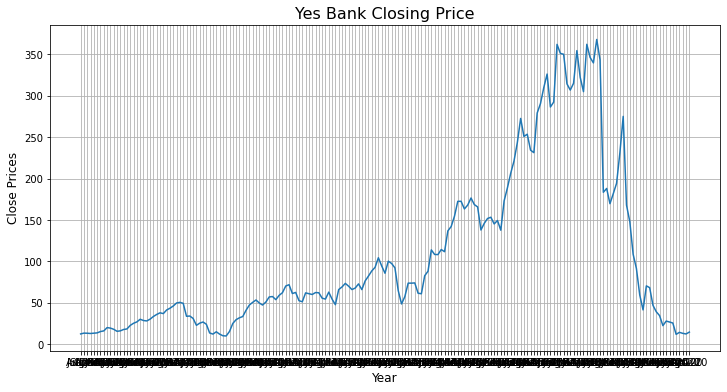

In [ ]:
# plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank Closing Price', fontsize=16)
plt.show()

--Yes Bank Closing Stock prices severely went down after 2018. This must be because of the fraud case involving Rana Kapoor

lets visualize close, open, low and high in combined line plot.

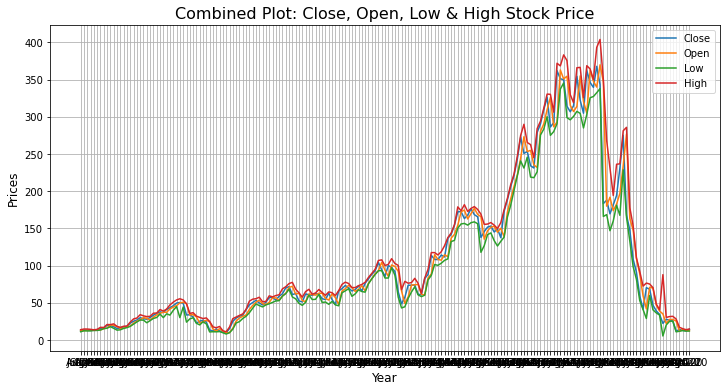

In [ ]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.grid()

--All the prices shows almost similar trends with each other.

--Which means that features may be strongly correlated with each other.

# **Dictribution of dependant variable i.e Close Price of stock.**

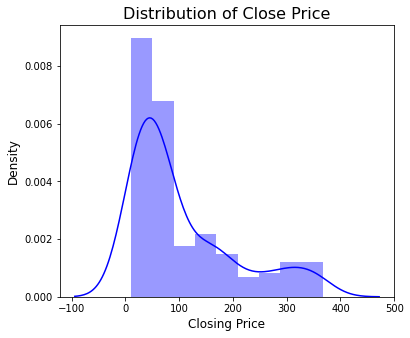

In [ ]:
# distribution plot of close price to look for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(df['Close'], color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

--Distribution plot of closing price is righty skewed.

--To make it normal distribution apply log transformation.


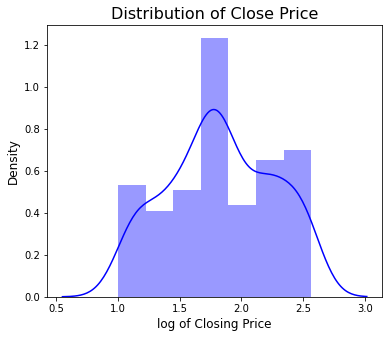

In [ ]:
# distribution plot of close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']), color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

--After log transformation, distribution of closing price is more normal.

# **Distribution of numerical features i.e High, Low and Open price of stock.**

In [ ]:
# make a list of independent numerical variables
numerical_features = list(set(df.describe().columns) - {'Close'})
numerical_features

['Open', 'Low', 'High']

<function matplotlib.pyplot.show(close=None, block=None)>

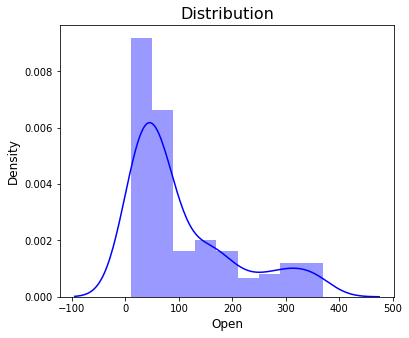

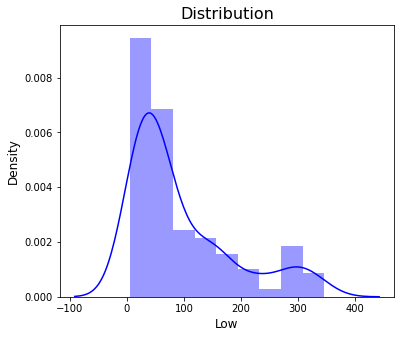

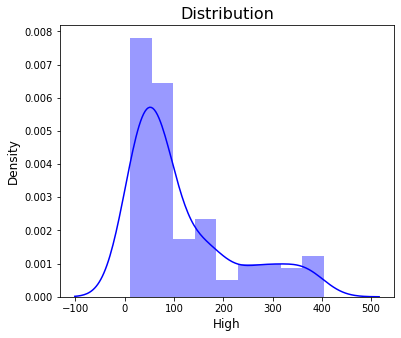

In [ ]:
# plotting distribution for each of numerical features.
for col in numerical_features:
  plt.figure(figsize=(6,5))
  sns.distplot(df[col], color='blue')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
plt.show

--All numerical features distribution are right skewed.

--Apply log transformation to make them normally distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

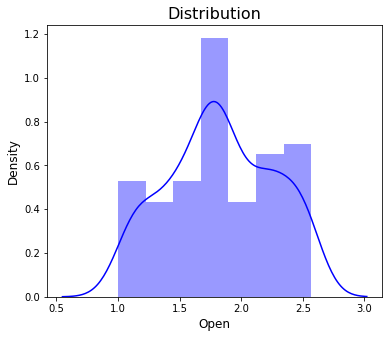

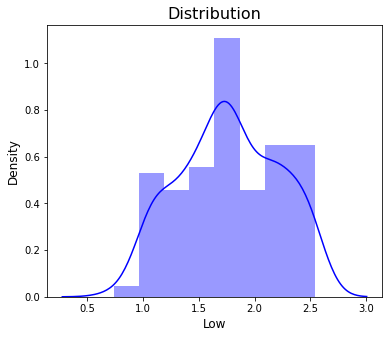

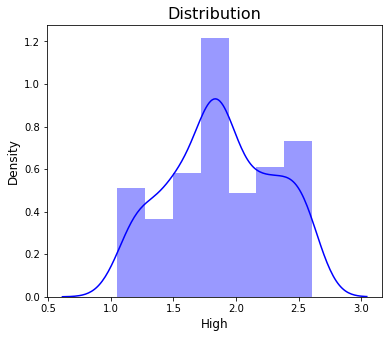

In [ ]:
# plotting distribution for each of numerical features by apply log transformation.
for col in numerical_features:
  plt.figure(figsize=(6,5))
  sns.distplot(np.log10(df[col]), color='blue')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
plt.show

--Now we have normally distributed numerical features.

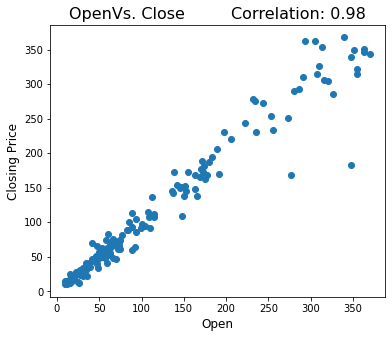

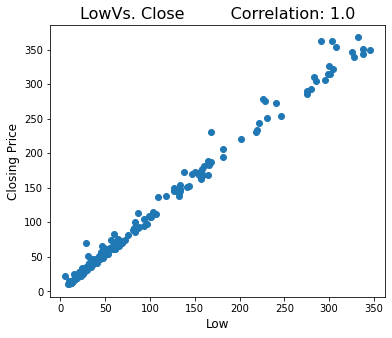

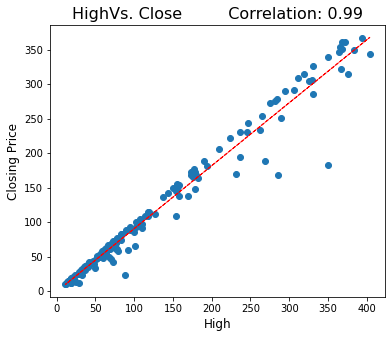

In [ ]:
for col in numerical_features:
  fig = plt.figure(figsize=(6,5))
  ax = fig.gca()
  feature = df[col]
  label = df['Close']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Closing Price', fontsize=12)
  ax.set_title(col + 'Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])

plt.plot(df[col], y_hat, "r--", lw=1)

Text(0.5, 1.0, 'Correlation Map')

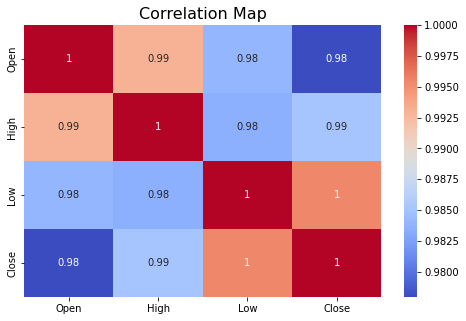

In [ ]:
# Correlation
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Map", fontsize=16)

--All variables shows high correlation with each other.

# **Transforming & Spliting Data**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


X = Independant Variable values

y = Dependent Variable values

In [ ]:
# Splitting our data into dependent and independent variables
X = df.drop(columns=['Close', 'Date'])
y = df['Close']

Data must be normal distributed. So applying narmalization on X & y.

**Normalisation**

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**Train(80%) & Test(20%) Split**


In [ ]:
# Splitting data into testing and training datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 1)

In [ ]:
# checking shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
# checking shape of testing dataset.
X_test.shape

(37, 3)

# **1. Linear Regression**

In [ ]:
# fitting data into linear regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
# train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.815

In [ ]:
# test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.823

In [ ]:
# prediction of test data
y_pred = linear_reg.predict(X_test)

 **Evaluation Metrics of Linear Regression:-**

In [ ]:
# Test performance of linear regression model
print("MSE :", round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :", round(mean_absolute_error(y_test, y_pred), 3))
print("MAPE :", round(mean_absolute_percentage_error(y_test, y_pred), 3))
print("R2 :", round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


**Linear Regression: Actual Vs. Predicted**

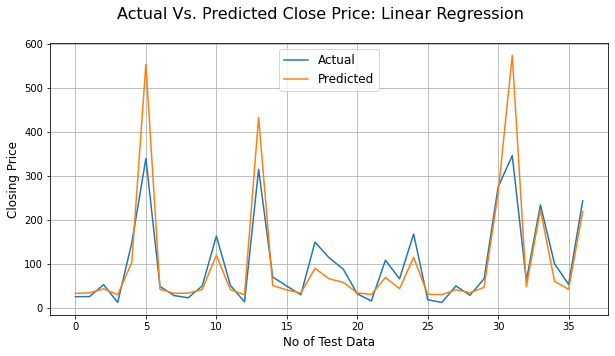

In [ ]:
# actual price vs predicted price for linear regression plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **2. Lasso Regression**

In [ ]:
# fittind data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005, max_iter=3000)
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [ ]:
# accuracy of Lasso Regression model
round(lasso_reg.score(X_train, y_train),3)

0.814

In [ ]:
# prediction of test data
y_pred_lasso = lasso_reg.predict(X_test)

**Evaluation Metrics of Lasso Regression:-**

In [ ]:
# test performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso), 3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
MAPE : 0.096
R2 : 0.82


**Lasso Regression: Actual Vs. Predicted**

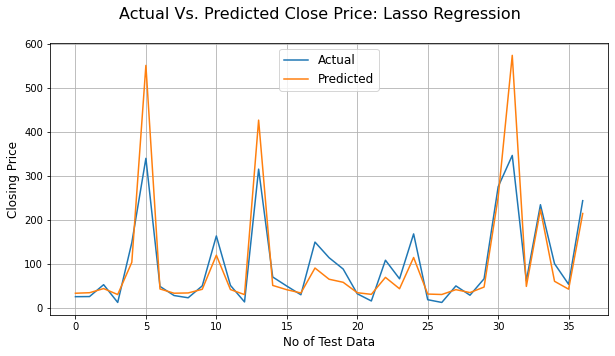

In [ ]:
# actual price vs predicted price for Lasso regression plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Cross Validation on Lasso Regression**

In [ ]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-parameter tuning for Lasso Regression

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)

In [ ]:
lasso_model_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :", round(lasso_model_cv.best_params_['alpha'],3))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.035


In [ ]:
# prediction of test data
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

**Evaluation Metrics of Lasso Regression after Validation:-**

In [ ]:
# test performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)), 3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv), 3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv), 3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 0.032
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.819


**Lasso Regression After Validation: Actual Vs. Predicted**

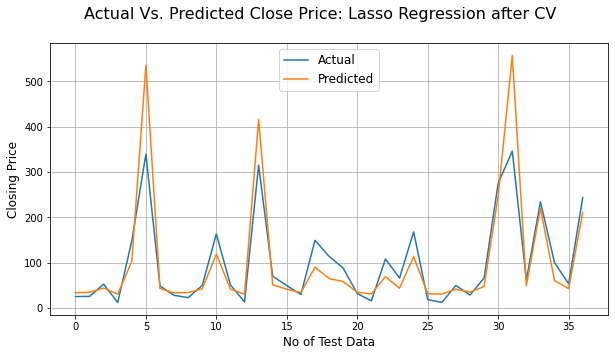

In [ ]:
# actual price vs predicted price for Lasso regression after validation plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression after CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **3. Ridge Regression**

In [ ]:
# fitting data into Rigde Regression 
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train, y_train)

In [ ]:
# accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),3)

0.815

In [ ]:
# prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# test performance of Ridge regression model.
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)), 3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge), 3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge), 3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


**Ridge Regression: Actual vs Predicted**


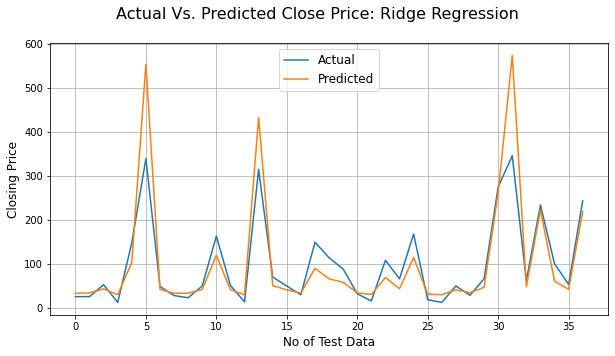

In [ ]:
# actual price vs predicted price for Ridge regression plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression ', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Cross Validation on Ridge Regression**

In [ ]:
# Hyper-parameter Tuning for lasso regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [ ]:
ridge_model_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :",ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 10
The negative mean squared error for is:  -0.035


In [ ]:
# prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

**Evaluation Metrics of Ridge Regression after Validation:-**

In [ ]:
# test performance of Ridge regression model after validation.
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)), 3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv), 3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv), 3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.033
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.817


**Ridge Regression After Validation: Actual vs Predicted**

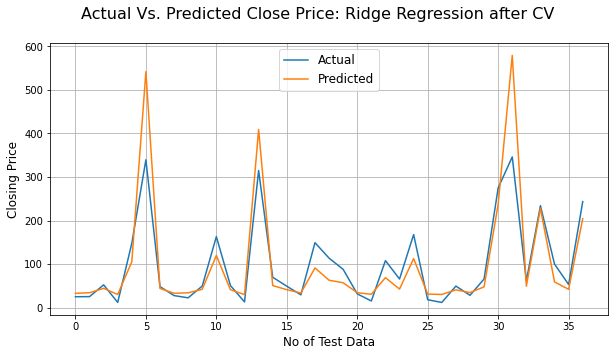

In [ ]:
# actual price vs predicted price for Ridge regression after validation plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression after CV ', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **4. Elastic Net**

In [ ]:
# fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train, y_train)

In [ ]:
# accuracy of lasso regression model
round(elastic.score(X_train, y_train),3)

0.796

In [ ]:
# prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [ ]:
# test performance of Elastic Net model.
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)), 3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic), 3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic), 3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.036
RMSE : 0.191
MAE : 0.157
MAPE : 0.102
R2 : 0.796


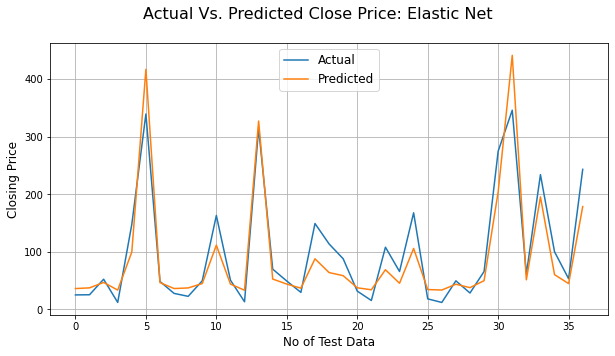

In [ ]:
# actual price vs predicted price for Elastic Net plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net ', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

Cross Validation on Elastic Net

In [ ]:
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
elastic_model_cv = GridSearchCV(elastic_cv, parameters, scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
print("The best fit alpha and L1 ration value is found out to be :", elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is:", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ration value is found out to be : 0.01 1
The negative mean squared error for is: -0.035


In [ ]:
# prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

**Evaluation Metrics of Elastic Net after validation:-**

In [ ]:
# Test performance of elastic net model after validation
print("MSE :", round(mean_squared_error(y_test, y_pred_elastic_cv), 3))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)), 3))
print("MAE :", round(mean_absolute_error(y_test, y_pred_elastic_cv), 3))
print("MAPE :", round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv), 3))
print("R2 :", round(r2_score(y_test, y_pred_elastic_cv), 3))

MSE : 0.032
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.819


**Elastic Net after validation: Actual vs Predicted**

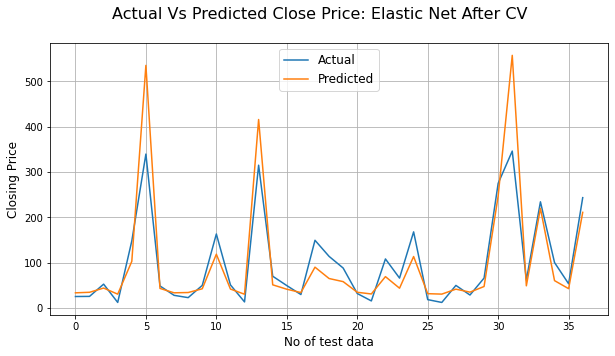

In [ ]:
# Actual price vs Predicted price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of test data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Evaluation Matrics Comparison:-**

In [ ]:
def compare_model(X_train,X_test, y_train, y_test, models):
  df_columns = []
  #creating dataframe to store the train and test metrics for each of the models
  df = pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fitting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)), 3)
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i,"MSE"] = MSE
    df.loc[i,"RMSE"] = RMSE
    df.loc[i,"MAE"] = MAE
    df.loc[i,"MAPE"] = MAPE
    df.loc[i,"R2"] = R2

    #To get values in next rows for next model
    i = i+1

  #Sorting values bu accuracy
  df.sort_values(by=['R2'], ascending = False, inplace = True, ignore_index=True)
  return df

In [ ]:
all_model = [linear_reg, lasso_reg, ridge_reg, elastic]

In [ ]:
# Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, all_model)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
0,LinearRegression,0.032,0.178,0.151,0.095,0.823
1,Ridge,0.032,0.178,0.151,0.095,0.823
2,Lasso,0.032,0.179,0.152,0.096,0.820
3,ElasticNet,0.036,0.191,0.157,0.102,0.796


**Comclusions:**



*   We got a maximum accuracy of 82%.

*   Linear, Lasso and Ridge Regression show almost same R squared values.

*   Whereas Elastic Net Model shows lowest R Squared value and high MSE, RMSE, MAE & MAPE.


*   Close, Open and High Price of stock are strongly correlated with each other.

